<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N¬∞07

**Objetivo**: Aplicar t√©cnicas b√°sicas de **Machine Learning** (tanto regresi√≥n como clasificaci√≥n), desde la preparaci√≥n de datos hasta el entrenamiento y evaluaci√≥n de modelos.

> **Nota**: Puede ayudarse de alg√∫n asistente virtual como **ChatGPT, Gemini** u otros, as√≠ como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensi√≥n.



## Regresi√≥n


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito espec√≠fico de California, junto con algunas estad√≠sticas resumen extra√≠das del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que ser√° necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geogr√°fica de la propiedad.
* **latitude**: Latitud geogr√°fica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: N√∫mero total de habitaciones.
* **total_bedrooms**: N√∫mero total de dormitorios.
* **population**: Poblaci√≥n en el √°rea circundante.
* **households**: N√∫mero de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al oc√©ano.

El objetivo de este an√°lisis es predecir el valor medio de las propiedades utilizando las caracter√≠sticas proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente r√∫brica de trabajo:

1. **Definici√≥n del problema**: Clarificar el objetivo del an√°lisis y los resultados esperados.
2. **Estad√≠stica descriptiva**: Resumir las principales caracter√≠sticas de los datos a trav√©s de medidas estad√≠sticas.
3. **Visualizaci√≥n descriptiva**: Utilizar gr√°ficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformaci√≥n de los datos.
5. **Selecci√≥n de modelo**: Comparar al menos cuatro modelos de predicci√≥n diferentes.
6. **M√©tricas y an√°lisis de resultados**: Evaluar el rendimiento de los modelos utilizando m√©tricas apropiadas.
7. **Visualizaci√≥n de resultados del modelo**: Crear gr√°ficos que muestren el desempe√±o de los modelos.
8. **Conclusiones**: Resumir los hallazgos del an√°lisis.

> **Nota**: Se anima a los estudiantes a desarrollar un an√°lisis m√°s profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas m√©tricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las m√©tricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [26]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [27]:
# FIXME

## Clasificaci√≥n


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicci√≥n posible de las im√°genes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploraci√≥n estad√≠stica, la visualizaci√≥n y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificaci√≥n:
    * Regresi√≥n log√≠stica.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o m√°s, de libre elecci√≥n. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes m√©tricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

### Exploraci√≥n de los datos
A continuaci√≥n se carga el conjunto de datos a utilizar, a trav√©s del sub-m√≥dulo `datasets` de `sklearn`.

In [28]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [30]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [31]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuaci√≥n se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representaci√≥n de la imagen en escala de grises (0-blanco, 255-negro) y la √∫ltima correspondiente al d√≠gito (`target`) con el nombre _target_.

In [32]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

c00  c01  c02  c03  c04  c05  c06  c07  c08  c09  ...  c55  c56  c57  c58  \
0    0    0    5   13    9    1    0    0    0    0  ...    0    0    0    6   
1    0    0    0   12   13    5    0    0    0    0  ...    0    0    0    0   
2    0    0    0    4   15   12    0    0    0    0  ...    0    0    0    0   
3    0    0    7   15   13    1    0    0    0    8  ...    0    0    0    7   
4    0    0    0    1   11    0    0    0    0    0  ...    0    0    0    0   

   c59  c60  c61  c62  c63  target  
0   13   10    0    0    0       0  
1   11   16   10    0    0       1  
2    3   11   16    9    0       2  
3   13   13    9    0    0       3  
4    2   16    4    0    0       4  

[5 rows x 65 columns]

### Ejercicio 1
**An√°lisis exploratorio:** Realiza tu an√°lisis exploratorio, no debes olvidar nada! Recuerda, cada an√°lisis debe responder una pregunta.

Algunas sugerencias:

* ¬øC√≥mo se distribuyen los datos?
* ¬øCu√°nta memoria estoy utilizando?
* ¬øQu√© tipo de datos son?
* ¬øCu√°ntos registros por clase hay?
* ¬øHay registros que no se correspondan con tu conocimiento previo de los datos?

Para la distribucion de los datos notemos que la dimension del dataset esta dada por:
Dimensiones del dataset: (1797, 65)

La memoria utilizada es:
912.67 KB

Los tipos de datos son:
c00       int64
c01       int64
c02       int64
c03       int64
c04       int64
          ...  
c60       int64
c61       int64
c62       int64
c63       int64
target    int64
Length: 65, dtype: object

La siguiente lista y grafico explicitan los registros por clase y su respectiva distribuci√≥n:
target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


/tmp/ipython-input-3316681031.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=digits, palette='viridis')


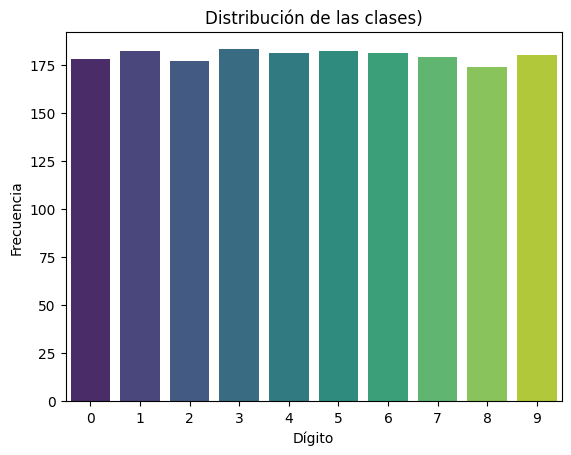


Finalmente vamos a estudiar las primeras filas del dataset, para identificar registros que no se correspondan con el conocimiento previo de los datos:


c00  c01  c02  c03  c04  c05  c06  c07  c08  c09  ...  c55  c56  c57  c58  \
0    0    0    5   13    9    1    0    0    0    0  ...    0    0    0    6   
1    0    0    0   12   13    5    0    0    0    0  ...    0    0    0    0   
2    0    0    0    4   15   12    0    0    0    0  ...    0    0    0    0   
3    0    0    7   15   13    1    0    0    0    8  ...    0    0    0    7   
4    0    0    0    1   11    0    0    0    0    0  ...    0    0    0    0   

   c59  c60  c61  c62  c63  target  
0   13   10    0    0    0       0  
1   11   16   10    0    0       1  
2    3   11   16    9    0       2  
3   13   13    9    0    0       3  
4    2   16    4    0    0       4  

[5 rows x 65 columns]


A partir de la tabla con las rpimeras filas del dataset concluimos que no hay registros que no se correspondan con el conocimiento previo de los datos  


In [33]:
print("Para la distribucion de los datos notemos que la dimension del dataset esta dada por:")
print("Dimensiones del dataset:", digits.shape)

print("\nLa memoria utilizada es:")
print(round(digits.memory_usage(deep=True).sum() / 1024, 2), "KB")

print("\nLos tipos de datos son:")
print(digits.dtypes)

print("\nLa siguiente lista y grafico explicitan los registros por clase y su respectiva distribuci√≥n:")
print(digits['target'].value_counts().sort_index())

sns.countplot(x='target', data=digits, palette='viridis')
plt.title('Distribuci√≥n de las clases)')
plt.xlabel('D√≠gito')
plt.ylabel('Frecuencia')
plt.show()

print("\nFinalmente vamos a estudiar las primeras filas del dataset, para identificar registros que no se correspondan con el conocimiento previo de los datos:")
display(digits.head())

print("\nA partir de la tabla con las rpimeras filas del dataset concluimos que no hay registros que no se correspondan con el conocimiento previo de los datos  ")


### Ejercicio 2
**Visualizaci√≥n:** Para visualizar los datos utilizaremos el m√©todo `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el d√≠gito. Superpondremos adem√°s el label correspondiente al d√≠gito, mediante el m√©todo `text`. Esto nos permitir√° comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [34]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza im√°genes de los d√≠gitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el m√©todo `imshow`. Puedes hacer una grilla de varias im√°genes al mismo tiempo!

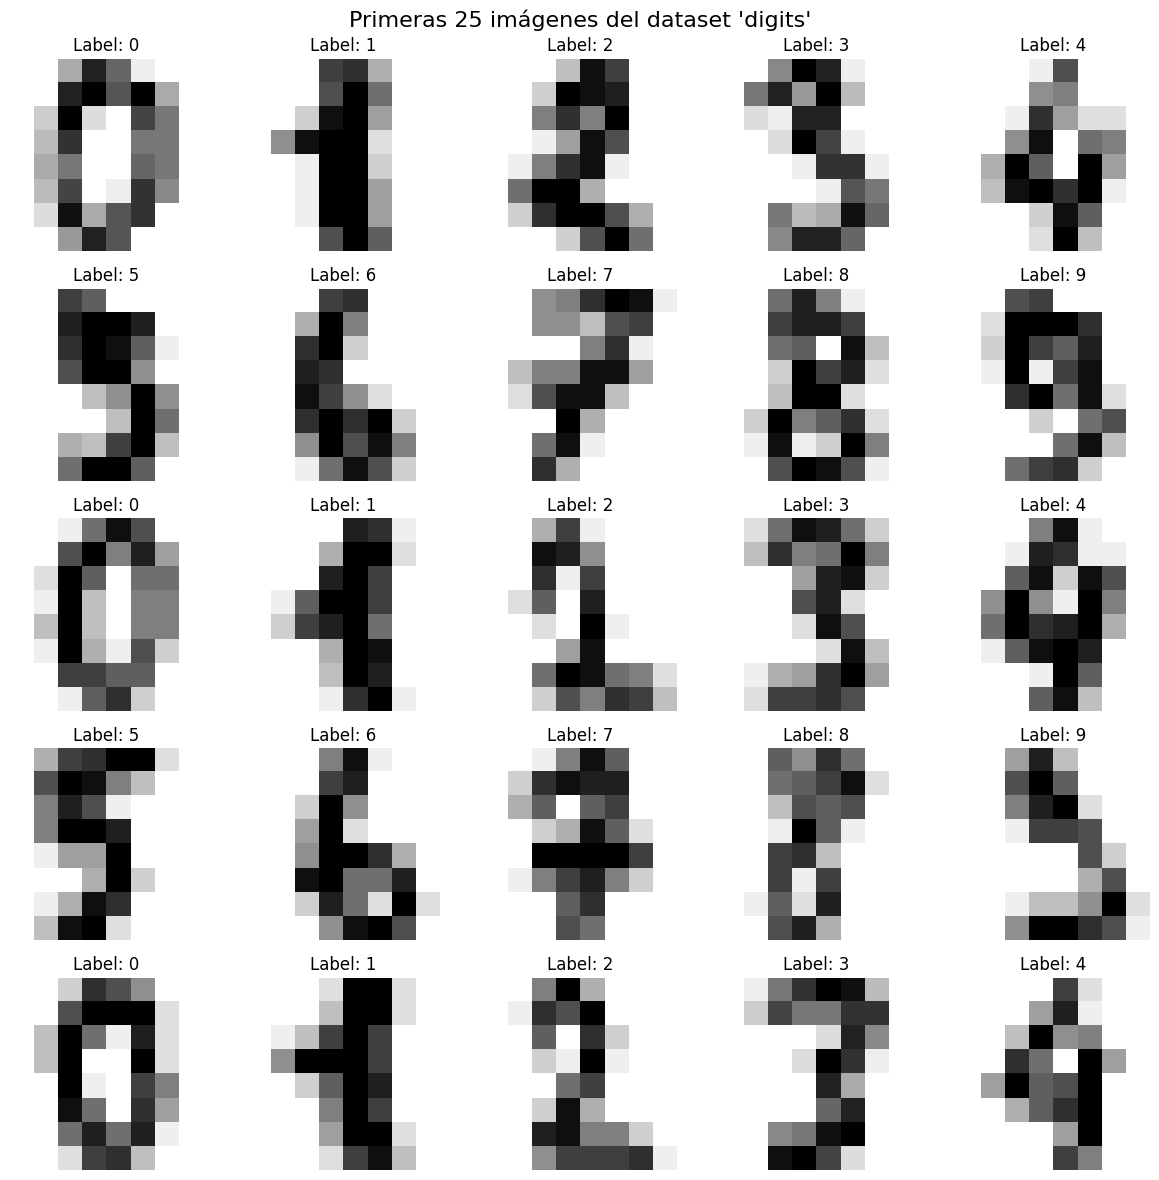

In [35]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
fig.suptitle("Primeras 25 im√°genes del dataset 'digits'", fontsize=16)

for i in range(nx * ny):
    ax = axs[i // ny, i % ny]
    ax.imshow(digits_dict["images"][i], cmap='gray_r')
    ax.set_title(f"Label: {digits_dict['target'][i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librer√≠a de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librer√≠a sklearn.

* **M√©tricas**:
     * Graficar matriz de confusi√≥n.
     * Analizar m√©tricas de error.



__Preguntas a responder:__

* ¬øCu√°l modelo es mejor basado en sus m√©tricas?
* ¬øCu√°l modelo demora menos tiempo en ajustarse?
* ¬øQu√© modelo escoges?


In [36]:
from sklearn.model_selection import train_test_split
# features, target

X = digits.drop(columns="target").values
y = digits["target"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tama√±o del set de entrenamiento:", X_train.shape)
print("Tama√±o del set de testeo:", X_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

modelos = {
    "Regresi√≥n Log√≠stica": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

resultados = {}

for nombre, modelo in modelos.items():
    inicio = time.time()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    fin = time.time()

    acc = modelo.score(X_test, y_test)
    resultados[nombre] = {
        "Accuracy": acc,
        "Tiempo (s)": round(fin - inicio, 3)
    }

    print(f"\nüîπ {nombre}")
    print("Accuracy:", round(acc, 4))
    print("Tiempo:", round(fin - inicio, 3), "segundos")
    print(classification_report(y_test, y_pred))
    pd.DataFrame(resultados).T

Tama√±o del set de entrenamiento: (1437, 64)
Tama√±o del set de testeo: (360, 64)

üîπ Regresi√≥n Log√≠stica
Accuracy: 0.9583
Tiempo: 1.401 segundos
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.89      0.89        36
           2       0.97      1.00      0.99        35
           3       0.95      1.00      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.86      0.86      0.86        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360


üîπ KNN
Accuracy: 0.9833
Tiempo: 0.039 segundos
              precision    recall  f1-sco

El mejor modelo basado en sus metricas es KNN, ya que tiene las metricas "Accuracy", "macro avg" y "weighted avg" mas altas en comparacion con los otros modelos
Por otro lado, KNN tambien es el modelo que se demora menos en ajustarse, con un tiempo de 0.032 segundos.
Dado que KNN es el mejor modelo basado en sus metricas, y tambien es el modelo que demora menos tiempo en ajustarse, seria precisamente el modelo que yo escogeria.

### Ejercicio 4

__Comprensi√≥n del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gr√°ficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC‚ÄìROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, par√°metros y m√©trica adecuada. Saque conclusiones del gr√°fico.

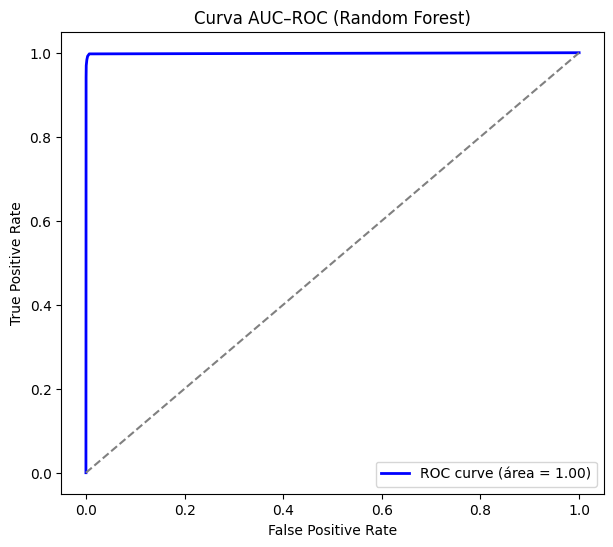

In [37]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay

y_bin = label_binarize(y_test, classes=np.arange(10))
n_classes = y_bin.shape[1]

modelo_mejor = KNeighborsClassifier(n_neighbors=5)
modelo_mejor.fit(X_train, y_train)
y_pred_proba = modelo_mejor.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_bin.ravel(), y_pred_proba.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (√°rea = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva AUC‚ÄìROC (Random Forest)")
plt.legend(loc="lower right")
plt.show()

Del grafico podemos notar que dicho modelo tiene un area de la curva de aproximadamente 1, lo que indica que tiene una excelente capacidad de clasificaci√≥n

### Ejercicio 5


__Visualizando Resultados:__ A continuaci√≥n se provee c√≥digo para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [38]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificaci√≥n en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observaci√≥n: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: n√∫mero de filas (subplots)
    :param ny: n√∫mero de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gr√°ficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¬øPor qu√© ocurren estas fallas?

valor predicho y original iguales:


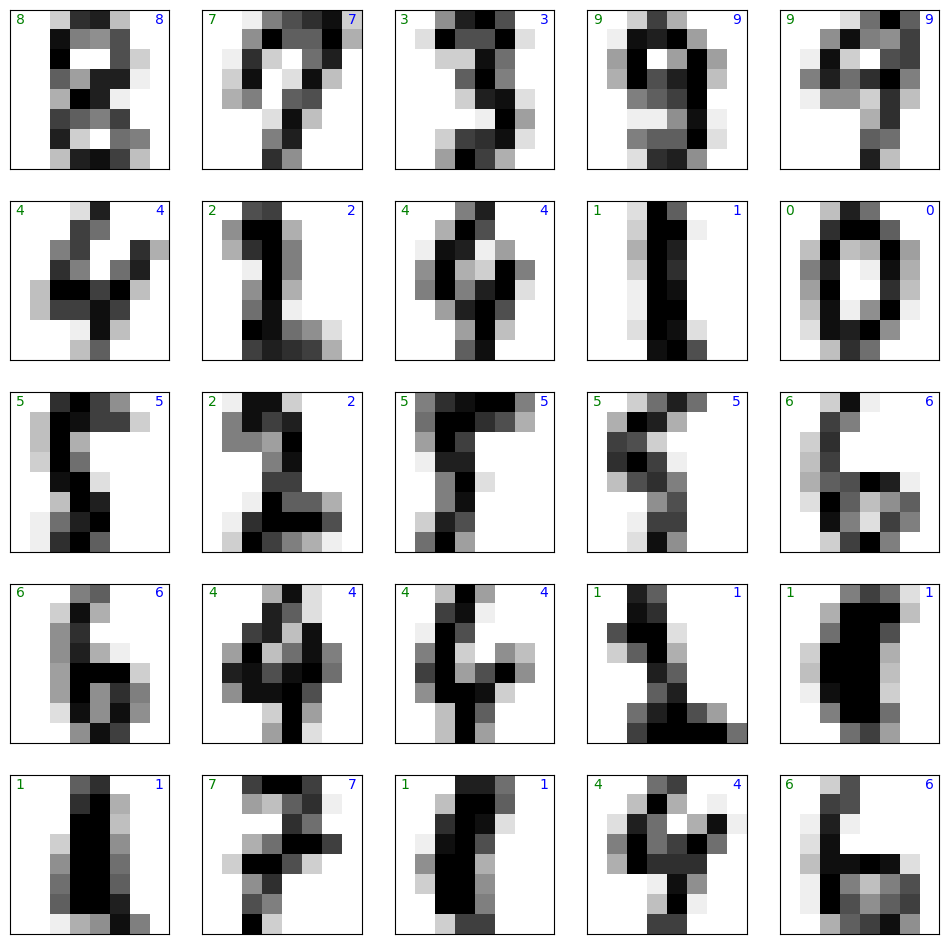

valor predicho y original distintos:


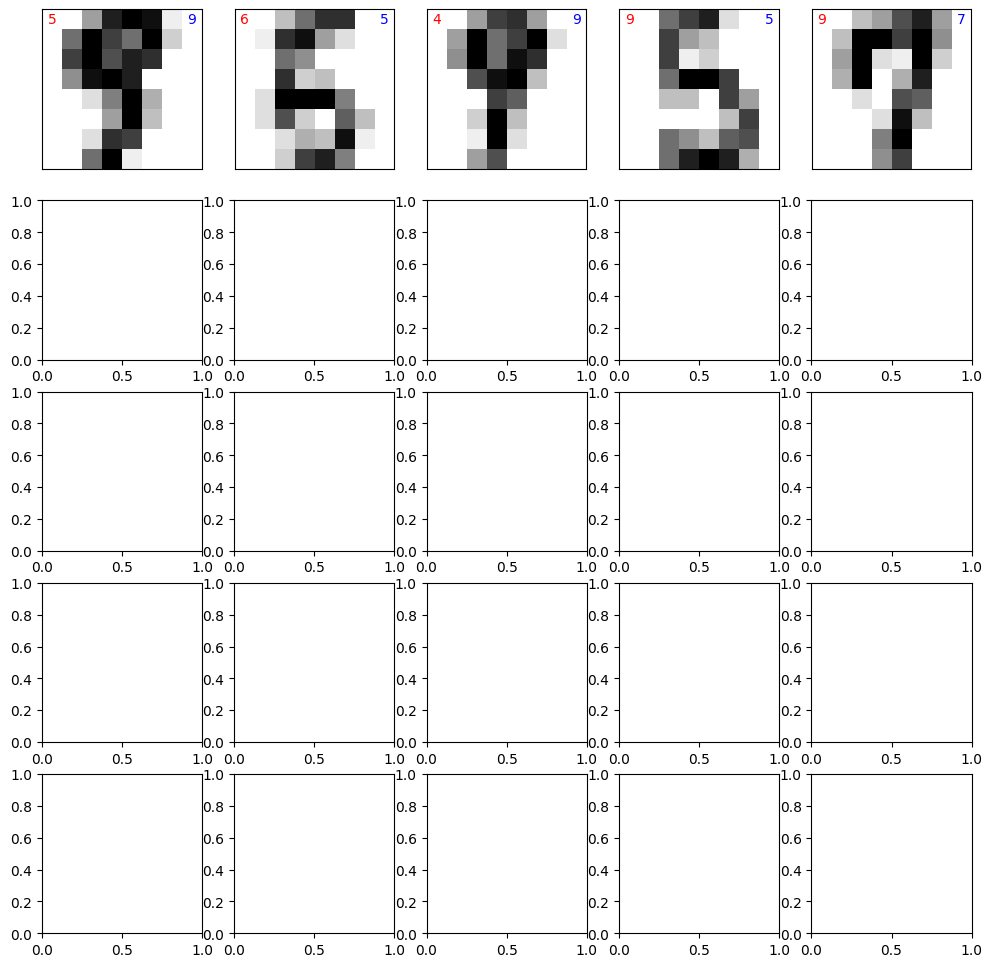

In [39]:
print("valor predicho y original iguales:")
mostrar_resultados(digits, modelo_mejor, nx=5, ny=5, label="correctos")
print("valor predicho y original distintos:")
mostrar_resultados(digits, modelo_mejor, nx=5, ny=5, label="incorrectos")

Las fallas ocurren por la existencia de una similitud visual entre ciertos digitos, la baja resolucion de las imagenes y eso sumado a las propias limitaciones del mejor modelo, en este caso el modelo KNN. En el caso particular de las celdas en blanco, esto ocurre porque el numero de errores reales es menor al total de subplots que se quieren graficar (25)

### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

En primer lugar podemos notar que el dataset digits esta bien balanceado en terminos generales, lo que permite comparar modelos de manera mas sencilla.
Dentro de estos modelos, el "Random Forest" fue el modelo mas preciso. Por otro lado, el modelo "Regresi√≥n Log√≠stica" fue el modelo mas rapido, aunque con un desempe√±o global menor en terminos generales.
Sobre algunas mejores que se pueden implementar para trabajos futuros, podemos aplicar redes neuronales o ajustar hiperpar√°metros.